In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mobile data.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()

In [8]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

In [9]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
y.head()

0    3
1    3
2    1
3    2
4    1
Name: price_range, dtype: int64

In [11]:
x.shape

(2000, 20)

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.70,random_state=1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
train_score = []
test_score = []

In [16]:
max_depths = [ m for m in range(1,25)]

In [17]:
for i in max_depths:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(xtrain,ytrain)
    
    #Training Accuracy
    train_acc = clf.score(xtrain, ytrain)
    train_score.append(train_acc)
    
    #Testing Accuracy
    test_acc = clf.score(xtest, ytest)
    test_score.append(test_acc)
    
    print('Depth =%d, Train Acc =%f, Test Acc =%f' % (i,train_acc,test_acc))


Depth =1, Train Acc =0.498333, Test Acc =0.453571
Depth =2, Train Acc =0.696667, Test Acc =0.624286
Depth =3, Train Acc =0.801667, Test Acc =0.752857
Depth =4, Train Acc =0.826667, Test Acc =0.751429
Depth =5, Train Acc =0.876667, Test Acc =0.760714
Depth =6, Train Acc =0.940000, Test Acc =0.831429
Depth =7, Train Acc =0.968333, Test Acc =0.821429
Depth =8, Train Acc =0.993333, Test Acc =0.817857
Depth =9, Train Acc =1.000000, Test Acc =0.810714
Depth =10, Train Acc =1.000000, Test Acc =0.812857
Depth =11, Train Acc =1.000000, Test Acc =0.807143
Depth =12, Train Acc =1.000000, Test Acc =0.817857
Depth =13, Train Acc =1.000000, Test Acc =0.814286
Depth =14, Train Acc =1.000000, Test Acc =0.813571
Depth =15, Train Acc =1.000000, Test Acc =0.814286
Depth =16, Train Acc =1.000000, Test Acc =0.817857
Depth =17, Train Acc =1.000000, Test Acc =0.814286
Depth =18, Train Acc =1.000000, Test Acc =0.816429
Depth =19, Train Acc =1.000000, Test Acc =0.822857
Depth =20, Train Acc =1.000000, Test Acc

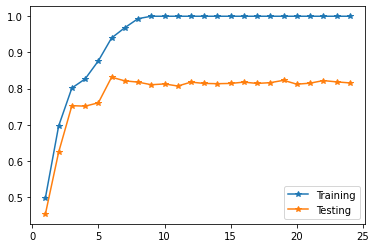

In [18]:
import matplotlib.pyplot as plt
plt.plot(max_depths, train_score, '-*', label='Training')
plt.plot(max_depths, test_score, '-*', label='Testing')
plt.legend()

In [19]:
criterions = ['gini', 'entropy']

In [20]:
for i in criterions:
    clf = DecisionTreeClassifier(criterion=i)
    clf.fit(xtrain,ytrain)
    
    #Training Accuracy
    train_acc = clf.score(xtrain, ytrain)
    train_score.append(train_acc)
    
    #Testing Accuracy
    test_acc = clf.score(xtest, ytest)
    test_score.append(test_acc)
    
    print('Train Acc =%f, Test Acc =%f' % (train_acc,test_acc))


Train Acc =1.000000, Test Acc =0.817857
Train Acc =1.000000, Test Acc =0.834286


# Feature Selection

# ---------Extra Trees Classifier---------------

In [21]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [22]:
from sklearn.ensemble import ExtraTreesClassifier 

In [23]:
x1 = df2.drop(['price_range'],axis=1)
y1 = df2['price_range']

In [24]:
x1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [25]:
y1.head()

0    3
1    3
2    1
3    2
4    1
Name: price_range, dtype: int64

In [26]:
y1.value_counts()

1    501
3    501
0    500
2    498
Name: price_range, dtype: int64

In [27]:
x1.shape

(2000, 20)

In [28]:
ext = ExtraTreesClassifier()

In [29]:
ext.fit(x1,y1)

ExtraTreesClassifier()

In [30]:
feature_importance = ext.feature_importances_
feature_importance #info gain

array([0.06145471, 0.02012071, 0.03308389, 0.01884728, 0.03256827,
       0.01752061, 0.03519933, 0.03397223, 0.03600394, 0.03356844,
       0.03417917, 0.0464785 , 0.04903164, 0.39294807, 0.0335833 ,
       0.03383665, 0.03459758, 0.01431196, 0.01830655, 0.02038718])

In [31]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(10)

,Gain_Score
0,0.061455
1,0.020121
2,0.033084
3,0.018847
4,0.032568
5,0.017521
6,0.035199
7,0.033972
8,0.036004
9,0.033568


In [32]:
col = pd.DataFrame(x.columns, columns=['Feature_Names'])
col.head(10)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [33]:
t_gains = pd.concat([col,imp],axis=1)
t_gains

,Feature_Names,Gain_Score
0,battery_power,0.061455
1,blue,0.020121
2,clock_speed,0.033084
3,dual_sim,0.018847
4,fc,0.032568
5,four_g,0.017521
6,int_memory,0.035199
7,m_dep,0.033972
8,mobile_wt,0.036004
9,n_cores,0.033568


In [34]:
t_gains.nlargest(15, 'Gain_Score')

,Feature_Names,Gain_Score
13,ram,0.392948
0,battery_power,0.061455
12,px_width,0.049032
11,px_height,0.046478
8,mobile_wt,0.036004
6,int_memory,0.035199
16,talk_time,0.034598
10,pc,0.034179
7,m_dep,0.033972
15,sc_w,0.033837


In [35]:
t_gains.nsmallest(5, 'Gain_Score')

,Feature_Names,Gain_Score
17,three_g,0.014312
5,four_g,0.017521
18,touch_screen,0.018307
3,dual_sim,0.018847
1,blue,0.020121


In [36]:
newx1 = t_gains.nlargest(18,'Gain_Score')
newx1

,Feature_Names,Gain_Score
13,ram,0.392948
0,battery_power,0.061455
12,px_width,0.049032
11,px_height,0.046478
8,mobile_wt,0.036004
6,int_memory,0.035199
16,talk_time,0.034598
10,pc,0.034179
7,m_dep,0.033972
15,sc_w,0.033837


<AxesSubplot:>

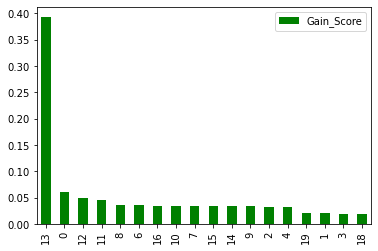

In [37]:
newx1.plot(kind='bar',color=['green']) 

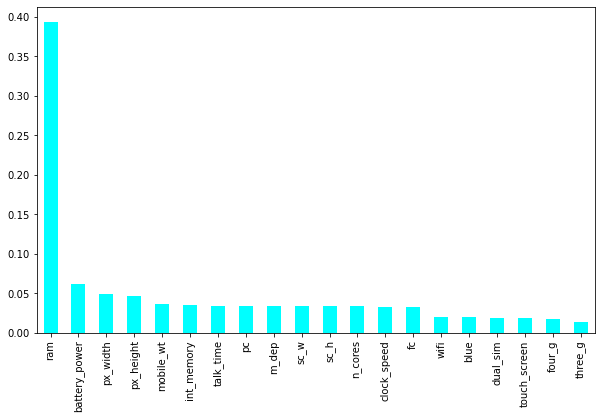

In [38]:
features = pd.Series(ext.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='bar', color='cyan')
plt.savefig('score1.png')

In [39]:
#x = newx
x1.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011792,0.012088,-0.041499,0.031728,0.016252,-0.003256,0.035329,0.003405,-0.029628,0.029055,0.015460,-0.006547,-0.001211,-0.029862,-0.020972,0.050825,0.011937,-0.011438,-0.008686
blue,0.011792,1.000000,0.022208,0.033198,0.004421,0.010430,0.040035,0.004904,-0.008509,0.036176,-0.009759,-0.008042,-0.043692,0.025296,-0.002829,0.002223,0.015683,-0.032583,0.009071,-0.019863
clock_speed,0.012088,0.022208,1.000000,-0.000013,-0.002228,-0.040497,0.008211,-0.013967,0.013040,-0.005288,-0.006902,-0.012916,-0.006062,0.003320,-0.028834,-0.008453,-0.014586,-0.044436,0.019796,-0.025748
dual_sim,-0.041499,0.033198,-0.000013,1.000000,-0.027660,0.002204,-0.016619,-0.024364,-0.008833,-0.025111,-0.016035,-0.023092,0.011648,0.041313,-0.012072,-0.014825,-0.037682,-0.014008,-0.018137,0.022740
fc,0.031728,0.004421,-0.002228,-0.027660,1.000000,-0.016691,-0.028369,-0.001180,0.023103,-0.014089,0.644736,-0.010013,-0.005447,0.015840,-0.009773,-0.011747,-0.005679,0.002206,-0.013414,0.018552
four_g,0.016252,0.010430,-0.040497,0.002204,-0.016691,1.000000,0.006831,-0.004381,-0.015238,-0.030379,-0.005887,-0.021476,0.005709,0.007835,0.025434,0.037128,-0.045850,0.583661,0.014719,-0.016604
int_memory,-0.003256,0.040035,0.008211,-0.016619,-0.028369,0.006831,1.000000,0.006267,-0.033450,-0.028415,-0.033384,0.008719,-0.010383,0.032136,0.037661,0.013886,-0.001618,-0.010301,-0.028666,0.007938
m_dep,0.035329,0.004904,-0.013967,-0.024364,-0.001180,-0.004381,0.006267,1.000000,0.021180,-0.002929,0.026722,0.025173,0.022626,-0.010876,-0.024976,-0.017654,0.017614,-0.014169,-0.003156,-0.026069
mobile_wt,0.003405,-0.008509,0.013040,-0.008833,0.023103,-0.015238,-0.033450,0.021180,1.000000,-0.018178,0.018626,0.001784,0.001767,-0.003159,-0.033877,-0.021301,0.004002,0.002776,-0.014787,-0.000497
n_cores,-0.029628,0.036176,-0.005288,-0.025111,-0.014089,-0.030379,-0.028415,-0.002929,-0.018178,1.000000,-0.002329,-0.007519,0.024629,0.004643,0.000039,0.026433,0.013272,-0.015518,0.023113,-0.009535


In [40]:
 x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

<AxesSubplot:>

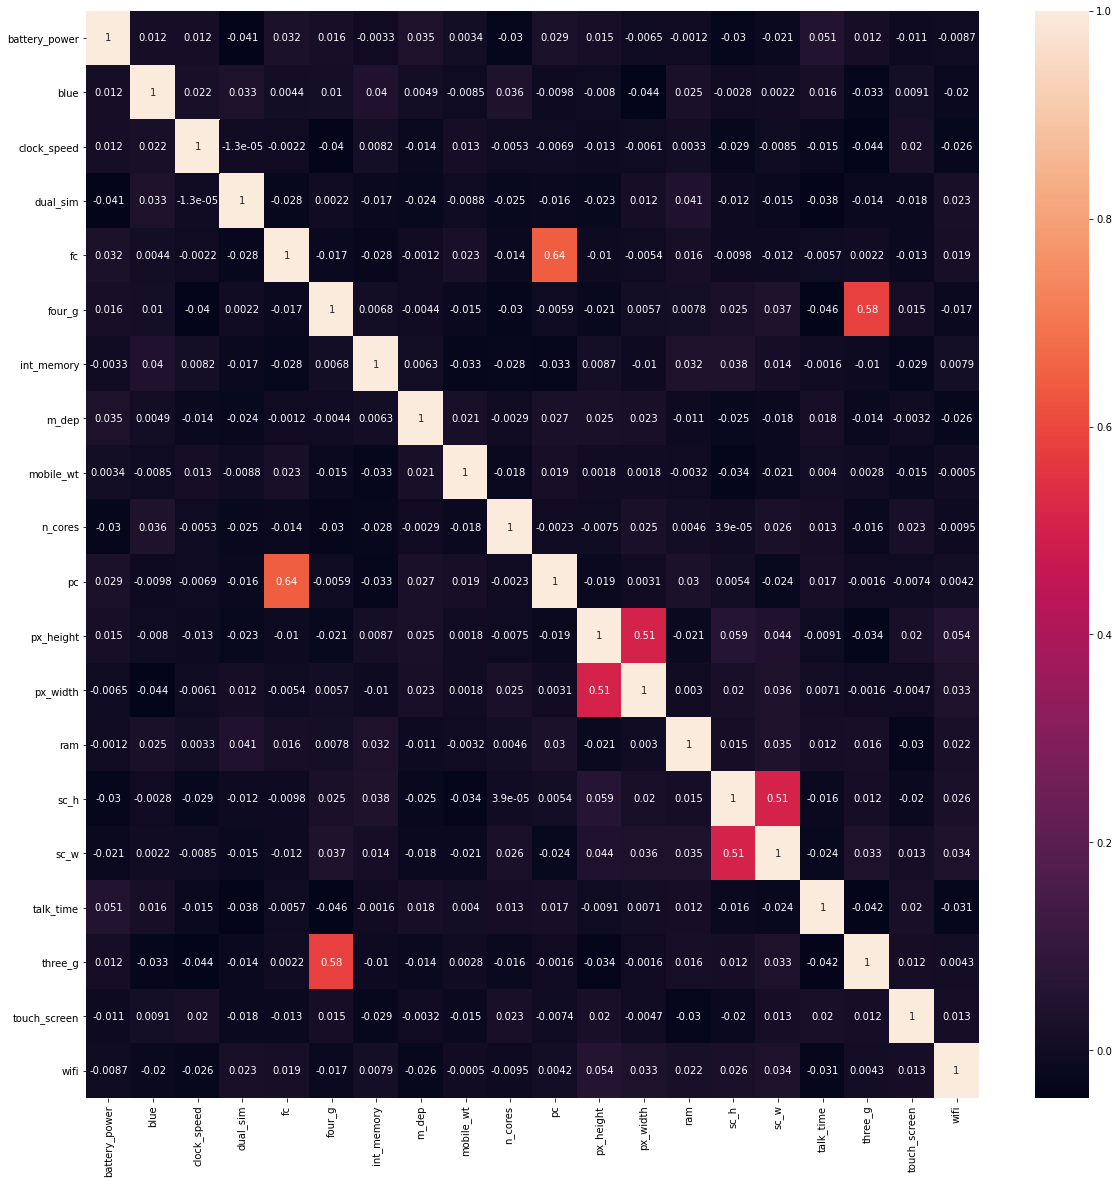

In [41]:
feature_names = x.columns #features name
colname = x.corr().index #Column name
plt.figure(figsize=(20,20))
sns.heatmap(df2[colname].corr(),annot=True)

In [42]:
feature_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [43]:
colname

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# Select K Best

In [44]:
x2 = df3.drop(['price_range'],axis=1)
y2 = df3['price_range']

In [45]:
x2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [46]:
y2.head()

0    3
1    3
2    1
3    2
4    1
Name: price_range, dtype: int64

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [48]:
mdl = SelectKBest(score_func=chi2)

In [49]:
fe_score = mdl.fit(x2,y2)

In [50]:
fe_score.scores_

array([1.39586914e+04, 6.97326729e-01, 8.05207989e-01, 7.21201743e-01,
       1.08792477e+01, 1.67755233e+00, 9.10777214e+01, 8.18368892e-01,
       9.68349858e+01, 8.94343722e+00, 9.71630692e+00, 1.73878228e+04,
       9.75834069e+03, 9.32330107e+05, 9.52154288e+00, 1.57771687e+01,
       1.35408021e+01, 3.14971336e-01, 2.17263851e+00, 3.87643714e-01])

In [51]:
cols = pd.DataFrame(fe_score.scores_, columns=['Feature_Scores'])
cols

,Feature_Scores
0,13958.691431
1,0.697327
2,0.805208
3,0.721202
4,10.879248
5,1.677552
6,91.077721
7,0.818369
8,96.834986
9,8.943437


In [52]:
col2 = pd.DataFrame(x.columns, columns=['Feature_Names'])
col2.head()

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [53]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,battery_power,13958.691431
1,blue,0.697327
2,clock_speed,0.805208
3,dual_sim,0.721202
4,fc,10.879248
5,four_g,1.677552
6,int_memory,91.077721
7,m_dep,0.818369
8,mobile_wt,96.834986
9,n_cores,8.943437


In [54]:
scores.nlargest(15, 'Feature_Scores')

,Feature_Names,Feature_Scores
13,ram,932330.107389
11,px_height,17387.822803
0,battery_power,13958.691431
12,px_width,9758.340687
8,mobile_wt,96.834986
6,int_memory,91.077721
15,sc_w,15.777169
16,talk_time,13.540802
4,fc,10.879248
10,pc,9.716307


In [55]:
scores.nsmallest(5, 'Feature_Scores')

,Feature_Names,Feature_Scores
17,three_g,0.314971
19,wifi,0.387644
1,blue,0.697327
3,dual_sim,0.721202
2,clock_speed,0.805208


# PCA

In [56]:
x3 = df4.drop(['price_range'],axis=1)
y3 = df4['price_range']

In [57]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [58]:
from sklearn.preprocessing import MinMaxScaler  

In [59]:
mmx = MinMaxScaler() 

In [60]:
scaled_x3 = mmx.fit_transform(x3)

In [61]:
scaled_x3.shape

(2000, 20)

In [62]:
scaled_x3

array([[0.18102872, 0.        , 0.24      , ..., 1.        , 1.        ,
        0.        ],
       [0.80694723, 1.        , 0.64      , ..., 1.        , 0.        ,
        0.        ],
       [0.96726787, 0.        , 0.84      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [63]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=4)
x_pca = pca.fit_transform(scaled_x3)
x_pca

array([[ 2.10563736e-01, -9.96945778e-02,  3.32018855e-04,
         1.47508448e-01],
       [ 2.88637360e-01,  2.29981934e-03,  8.08621005e-01,
        -3.52041022e-01],
       [ 9.30278151e-01,  1.25419004e-01, -7.03588532e-01,
        -5.41909563e-01],
       ...,
       [-5.67493074e-01, -3.16307790e-02,  6.63250927e-02,
         1.26826082e-01],
       [-5.66354174e-01, -7.64091210e-01, -4.41457046e-01,
         4.00961701e-01],
       [-5.12535983e-01,  6.58771161e-01, -3.70993875e-01,
         6.80380733e-01]])

In [73]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3','pca4'])
features

,pca1,pca2,pca3,pca4
0,0.210564,-0.099695,0.000332,0.147508
1,0.288637,0.002300,0.808621,-0.352041
2,0.930278,0.125419,-0.703589,-0.541910
3,0.301021,0.005113,0.778999,-0.312040
4,-0.543788,-0.169916,0.809098,0.534450
...,...,...,...,...
1995,-0.525795,0.545549,0.446043,0.487133
1996,0.291257,0.556111,-0.386575,0.702829
1997,-0.567493,-0.031631,0.066325,0.126826
1998,-0.566354,-0.764091,-0.441457,0.400962


In [74]:
from sklearn.model_selection import train_test_split as tts

In [75]:
xtrain3,xtest3, ytrain3,ytest3=tts(features,y3,test_size=.30)

In [76]:
xtrain3.head()

,pca1,pca2,pca3,pca4
788,-0.572739,-0.774494,-0.476359,0.365516
877,0.228644,-0.820441,-0.479096,0.404906
268,0.272227,0.561548,0.523069,0.513461
1330,0.902151,0.026780,-0.024011,-0.125099
1067,-0.552359,-0.145948,0.842587,0.568909


In [80]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()

In [81]:
clf2.fit(xtrain3,ytrain3)

DecisionTreeClassifier()

In [82]:
clf2.score(xtrain3,ytrain3)

1.0

In [83]:
clf2.score(xtest3,ytest3)

0.27

In [84]:
y.value_counts()

1    501
3    501
0    500
2    498
Name: price_range, dtype: int64

In [85]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [86]:
clf.fit(x,y)

DecisionTreeClassifier()

In [87]:
clf.score(x,y)

1.0